In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
#Displaying folders' names
import os
from zipfile import ZipFile

directory_list = list()
for root, dirs, files in os.walk("/content/gdrive/MyDrive/PFA DATA/preprocessed_data/", topdown=False):
    for name in files:
         with ZipFile('/content/gdrive/MyDrive/PFA DATA/preprocessed_data/'+name, 'r') as zipObj:
           # Extract all the contents of zip file in current directory
           zipObj.extractall()

print ('Done extracting all')

Done extracting all


In [ ]:
#Read extracted folders
import os

for root, dirs, files in os.walk("/content/content/content/", topdown=False):
  print(root)
    # for file in files:
    #     print(file)

In [ ]:
pip install nltk==3.4.5

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
import re
import string
import nltk  
from nltk.tokenize import word_tokenize 

In [ ]:
#import os
#os.listdir("/content/content/content/preprocessed_data_part1")
import os

import os

for root, dirs, files in os.walk("/content/content/content/", topdown=False):

  # Folder Path
  path = root

  # Read text File
  doc =[]
    
  def read_text_file(file_path):
      with open(file_path, 'r') as f:
          f.readline()
    

  # iterate through all file
  for file in os.listdir(path):
      # Check whether file is in text format or not
      if file.endswith(".txt"):
          file_path = f"{path}/{file}"
    
          # call read text file function
          with open(file_path, 'r') as f:
            doc.append(f.readline())


In [ ]:
#import os
#os.listdir("/content/content/content/preprocessed_data_part1")
import os
  
# Folder Path
path = "/content/content/content/preprocessed_data_part1"
  
# Change the directory
#os.chdir(path)
  
# Read text File
doc =[]
  
def read_text_file(file_path):
    with open(file_path, 'r') as f:
        f.readline()

In [ ]:
# iterate through all file
for file in os.listdir("/content/content/content/preprocessed_data_part1"):
    # Check whether file is in text format or not
    if file.endswith(".txt"):
        file_path = f"{path}/{file}"
  
        # call read text file function
        with open(file_path, 'r') as f:
          doc.append(f.readline())


In [ ]:
from nltk.corpus import stopwords
from nltk import word_tokenize

# Preparing the dataset
sentences = [nltk.word_tokenize(sentence) for sentence in doc]

In [ ]:
import gensim
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
model = Word2Vec(
        sentences,
        size=200,
        window=5,
        min_count=10,
        workers=100,
        iter=20)
model.save("word2vec.model")

In [ ]:
vector = model.wv['pub'] 
model.most_similar("war")

In [ ]:
array_vec = []
for idx, key in enumerate(model.wv.vocab):
  array_vec.append(model.wv[key])


Similarity graph

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd

plt.style.use('seaborn-whitegrid')

def tsne_scatterplot(model, search_word):
    labels = [search_word]
    tokens = [model[search_word]]
    similar = [1]
    close_words = model.similar_by_word(search_word, topn=10)
    for word in close_words:
        tokens.append(model[word[0]])
        labels.append(word[0])
        similar.append(word[1])

    tsne_model = TSNE(n_components=2, init='pca')
    coordinates = tsne_model.fit_transform(tokens)
    df = pd.DataFrame({'x': [x for x in coordinates[:, 0]],
                       'y': [y for y in coordinates[:, 1]],
                       'words': labels,
                       'similarity': similar}
                      )
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    plot = ax.scatter(df.x, df.y, c=df.similarity, cmap='Reds')
    for i in range(len(df)):
        ax.annotate("  {} ({:.2f})".format(df.words[i].title(),
                                           df.similarity[i]),
                    (df.x[i], df.y[i]))

    plt.colorbar(mappable=plot, ax=ax)
    plt.title('t-SNE visualization for {}'.format(search_word))
    plt.show()

tsne_scatterplot(model, "blood")

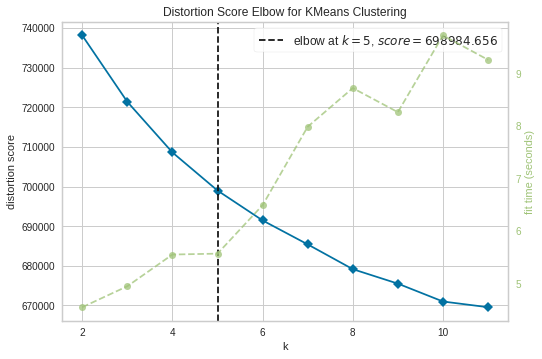

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
x= np.array(array_vec)
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

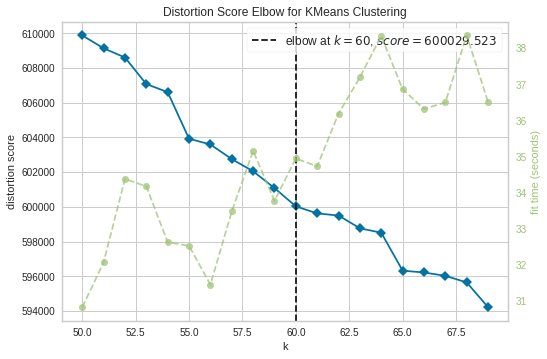

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f12b7988b90>,
                 estimator=KMeans(algorithm='auto', copy_x=True,
                                  init='k-means++', max_iter=300, n_clusters=69,
                                  n_init=10, n_jobs=None,
                                  precompute_distances='auto', random_state=4,
                                  tol=0.0001, verbose=0),
                 k=None, locate_elbow=True, metric='distortion', timings=True)

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
import numpy as np
x= np.array(array_vec)

# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=4), x, k=(50,70))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

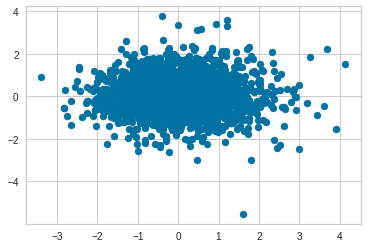

In [ ]:
plt.scatter(x[ : , 0], x[ :, 1], s = 50, c = 'b')
plt.show()

In [ ]:
from sklearn.manifold import TSNE


In [ ]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=10, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(24, 24)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [ ]:
tsne_plot(model)

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

NameError: ignored

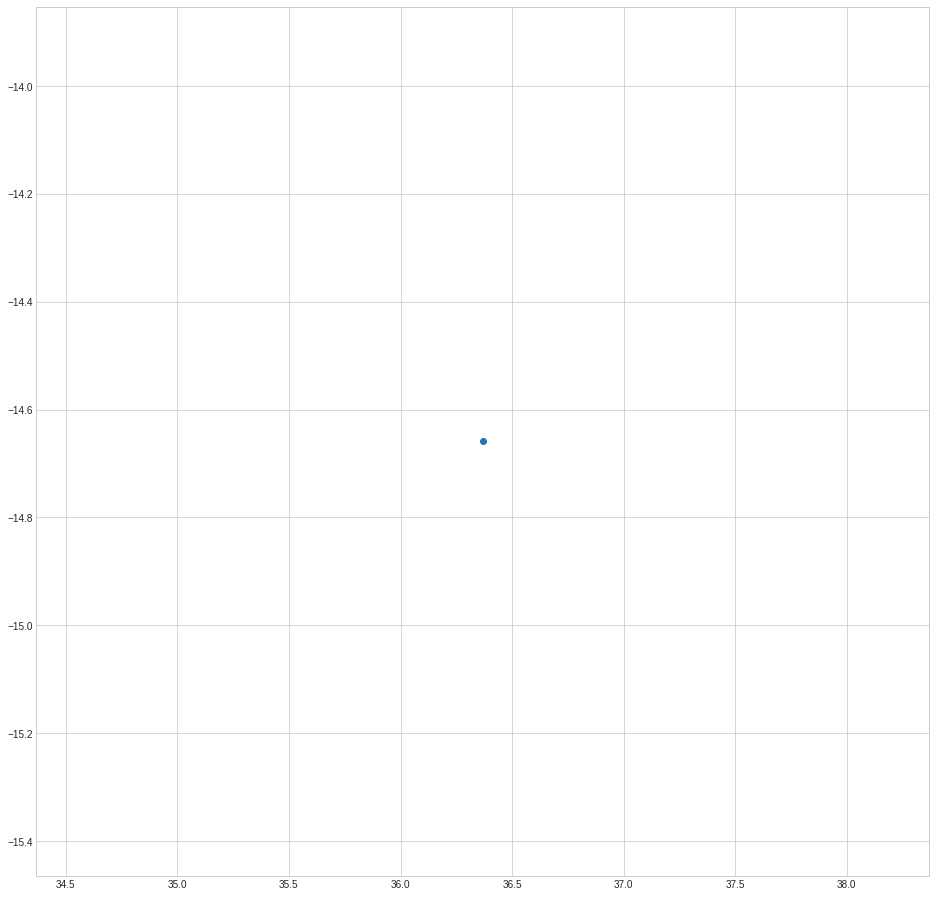

In [ ]:
labels = []

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(array_vec)
x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])
    
plt.figure(figsize=(16, 16)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
plt.show()